## Important instruction

For programming exercises that only editing, only edit the code as shown in the following format.

```
##############################################

#Edit the following code

var1 = 3
var2 = 4
print(var1 + var4)

##############################################
```

You are open to experimenting with the other parts of code but you will only be awarded points if the question asked is answered which only needs finishing or making changes to the code in the above specified format.

## Question 7: Dimensionality reduction using Principal Component Analysis (PCA) and t-Distributed Stochastic Neighbor Embedding (t-SNE).

Your task to implement PCA and t-SNE on Wine dataset from ```sklearn.datasets```. Please follow the below instructions to complete the exercise.

1. Load the Wine dataset from ```sklearn.datasets``` and standardize the features using ```StandardScaler``` from ```sklearn.preprocessing```.
2. The task is to perform PCA on the **standardized data** and experiment with different values of the ```n_components``` parameter. The goal is to find a value of ```n_components``` that captures variance above 90% and less than 95% (Check out ```explained_variance_ratio_``` attribute of PCA from sklearn documentation mentioned in the references).
3. Implement t-SNE on **standardized data** where ```n_components``` parameter value is set to 2 and ```perplexity``` parameter value to 30. Also check the ```perplexity``` parameter value of 1 and note your observations.

For more information, refer to the following resources:
* Sections **6.3: Principal Component Analysis** and **6.13: t-Distributed Stochastic Neighbor Embedding** of **Introduction to Machine Learning, 4th Edition, The MIT Press, 2020** by Ethem Alpaydın
* https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html
* https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
*   https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html
*   https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html
* https://distill.pub/2016/misread-tsne/



Explained variance percentage: 96.16971684450642

Number of components to achieve 90-95% of explained variance: 0.95


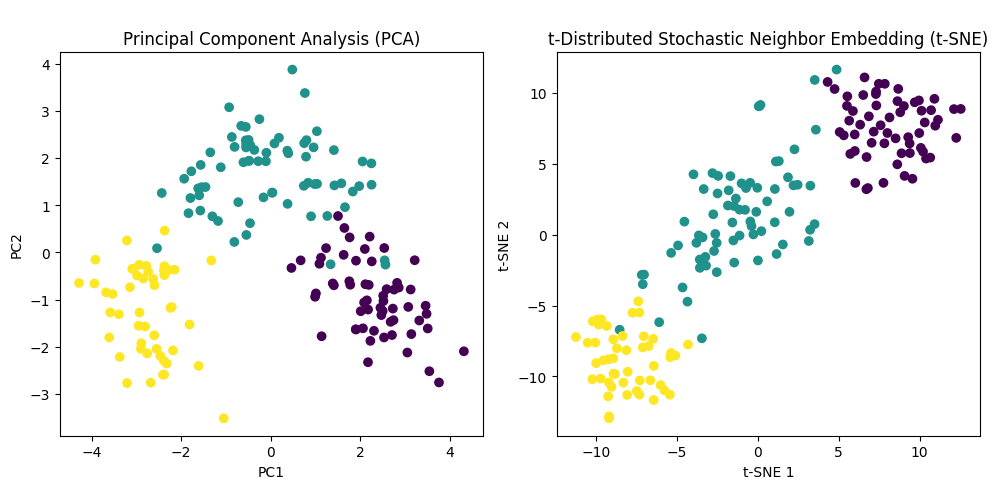

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_wine
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler


############################################################
#Write your code here

# Load and standardize the Wine dataset
wine = load_wine()
X = wine.data
y = wine.target

#Standardising the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform PCA
pca = PCA(n_components=0.95)
n_components =0.95
X_pca = pca.fit_transform(X_scaled)

# Calculate explained variance ratio
explained_variance = pca.explained_variance_ratio_

print("Explained variance percentage:", sum(explained_variance)*100)
print("\nNumber of components to achieve 90-95% of explained variance:", n_components)

# Perform t-SNE
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X_scaled)

############################################################

# Visualizations

plt.figure(figsize=(10, 5))

# PCA scatter plot
plt.subplot(1, 2, 1)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis')
plt.title("\nPrincipal Component Analysis (PCA)")
plt.xlabel("PC1")
plt.ylabel("PC2")

# t-SNE scatter plot
plt.subplot(1, 2, 2)
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='viridis')
plt.title("t-Distributed Stochastic Neighbor Embedding (t-SNE)")
plt.xlabel("t-SNE 1")
plt.ylabel("t-SNE 2")

plt.tight_layout()
plt.show()

### **Answer the following question with a brief reasoning.**
Having experimented with t-SNE using ```perplexity``` parameter values of 1 and 30, what distinctions did you observe in the visualizations, and which perplexity value do you believe effectively identifies clusters in the data?

Perplexity 1: Results in densely packed clusters with a focus on local relationships. It tends to overlook global structure, potentially leading to distorted representations of the data.
Perplexity 30: Produces more spread-out clusters, capturing both local and global structures effectively. This can result in a clearer representation of the overall data structure.
For identifying clusters in the data, a perplexity value around 30 tends to be more effective as it balances the consideration of local and global relationships, providing a clearer visualization of the underlying patterns.

## Question 8: Implementing k-Means Clustering.

You have a dataset named 'Mall_Customers.csv,' containing information about customers' annual income and spending score. Your goal is to perform customer segmentation using K-means clustering to identify distinct groups based on their spending behavior and income levels.

1. Select the relevant features for clustering, in this case, 'Annual Income' and 'Spending Score'.
3. Standardize the selected features to ensure equal importance during clustering.
4. Implement K-means clustering with a specified number of clusters. Experiment with different number of clusters and set ```n_clusters``` parameter of KMeans to a number which is clearly differentiates clusters.
5. Assign the cluster labels back to the original dataset.
6. Visualize the results by creating a scatter plot, where the x-axis represents 'Annual Income,' the y-axis represents 'Spending Score,' and the points are color-coded based on the assigned clusters. **Make sure to include, xlabel, ylabel and title to the output plot.**

For more information, refer to the following resources:
* Section **7.3: k-Means Clustering** of **Introduction to Machine Learning, 4th Edition, The MIT Press, 2020** by Ethem Alpaydın
* https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
* https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
* https://www.w3schools.com/python/matplotlib_scatter.asp


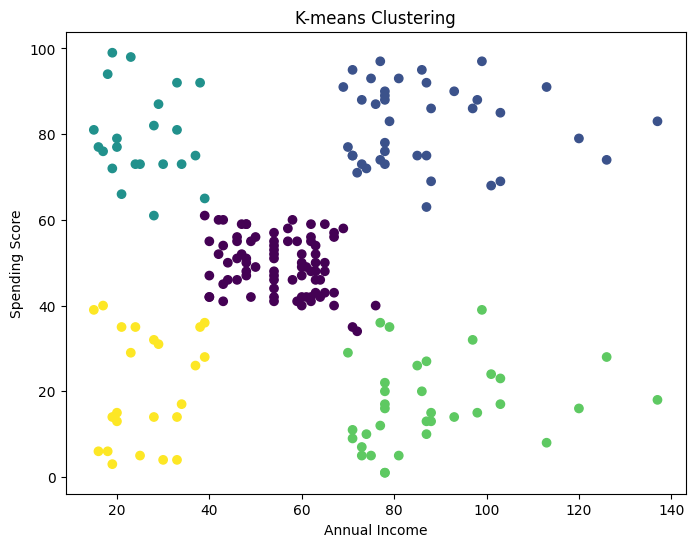

In [8]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load your dataset (Assuming you have a CSV file called 'customer_data.csv')
data = pd.read_csv('https://raw.githubusercontent.com/KrishnaTejaJ/datasets-CSCI-B455/main/assignment%204/Mall_Customers.csv')

############################################################
#Write your code here

# Select only 'Annual Income' and 'Spending Score'
X = data[['Annual Income', 'Spending Score']]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform K-means clustering
kmeans = KMeans(n_clusters=5, random_state=42)  # Assuming 5 clusters
kmeans.fit(X_scaled)

# Assign cluster labels back to the dataset
data['Cluster'] = kmeans.labels_

# Visualize the results
plt.figure(figsize=(8, 6))
plt.scatter(data['Annual Income'], data['Spending Score'], c=data['Cluster'], cmap='viridis')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.title('K-means Clustering')
plt.show()

############################################################


### **Answer the following question with a brief reasoning.**
What choice of the ```n_clusters``` parameter yields effective clustering results, and what insights were gained from the experimentation?

The choice of the n_clusters parameter in K-means clustering is critical for effective clustering results. Experimenting with various values and using metrics like the elbow method, silhouette score, or gap statistic helps identify the optimal number of clusters. This experimentation provides insights into the inherent structure of the data, revealing meaningful clusters for further analysis or decision-making.

## Question 9: Comparing clustering types

Your task to write a python code that will compare Single-Link Clustering, Complete-Link Clustering and k-Means Clustering. Please follow the below instructions to complete the exercise.

1. Load MNIST dataset using ```fetch_opeml``` from ```sklearn.datasets``` and normalise X by dividing it by 255.
2. Perform dimensionality reduction using PCA with ```n_components``` parameter set to 2. (This helps in visualising our final plots)
3. For computational reasons, we will be using only a subset of the data. Select the first 1000 observations of the data and work on those going forward.
4. Implement Single-Link Clustering using ```AgglomerativeClustering()``` with ```n_clusters``` and ```linkage``` parameters set to 10 and 'single' respectively.
5.  Implement Complete-Link Clustering using ```AgglomerativeClustering()``` with ```n_clusters``` and ```linkage``` parameters set to 10 and 'complete' respectively.
6.  Implement k-Means Clustering with ```n_clusters``` and ```random_state``` parameters set to 10 and 99 respectively.
7. Plot Single-Link, Complete-Link and k-Means Clustering using ```plot_clusters(X, labels, title)``` function provided with appropriate titles.


For more information, refer to the following resources:
* Section **7.8:  Hierarchical Clustering** of **Introduction to Machine Learning, 4th Edition, The MIT Press, 2020** by Ethem Alpaydın
* https://www.saigeetha.in/post/hierarchical-clustering-types-of-linkages
* https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_openml.html
* https://scikit-learn.org/stable/modules/clustering.html#hierarchical-clustering
* https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html

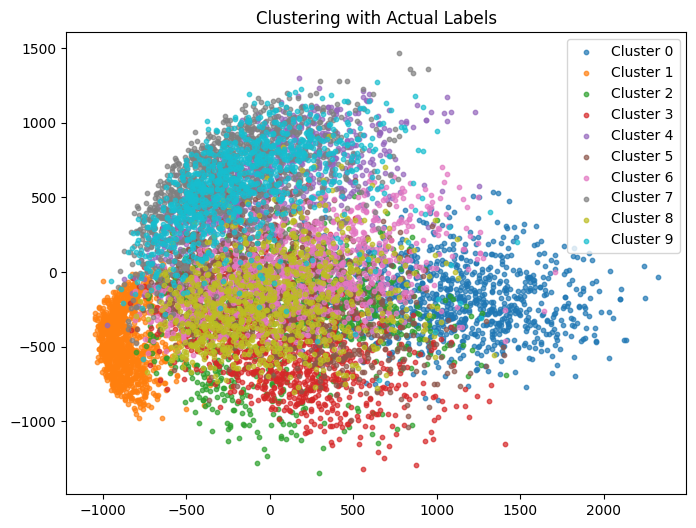

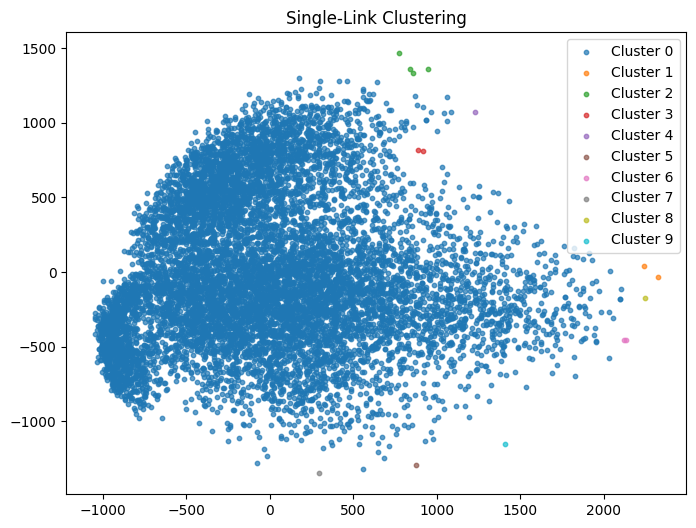

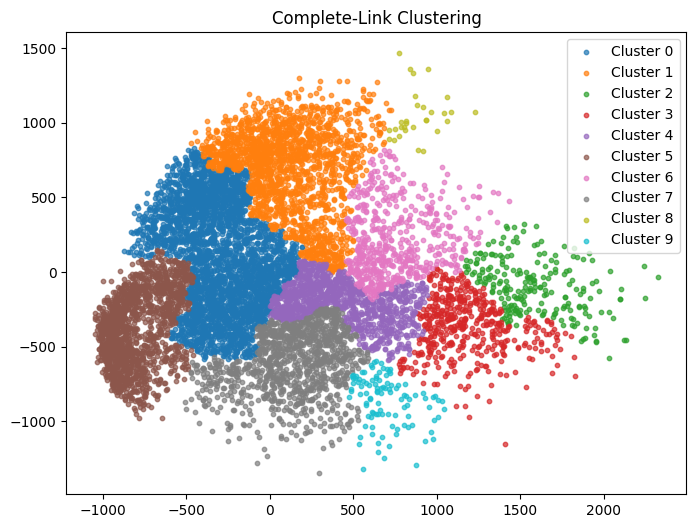

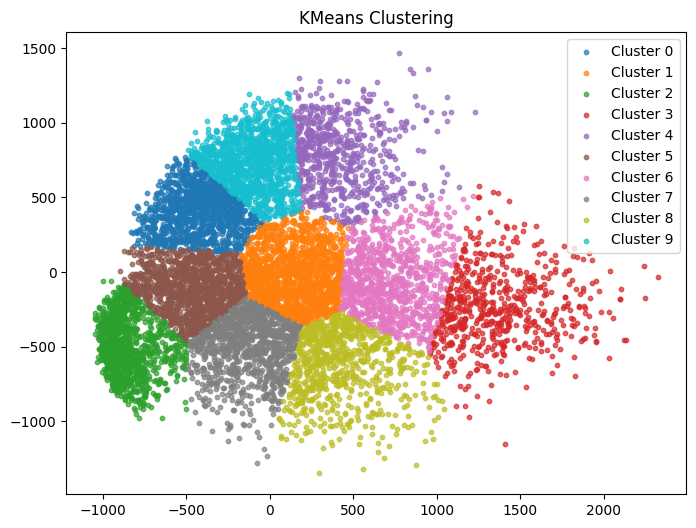

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA

# Function to visualize clustering results
def plot_clusters(X, labels, title):
    unique_labels = np.unique(labels)
    plt.figure(figsize=(8, 6))
    for label in unique_labels:
        cluster_points = X[labels == label]
        plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {label}', alpha=0.7, s=10)
    plt.title(title)
    plt.legend()
    plt.show()

############################################################
#Write your code here

# Load MNIST dataset
mnist = fetch_openml('mnist_784', version=1)
X = mnist.data
y = mnist.target.astype(int)

# Perform PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Choose a subset of data
subset_size = 10000
X_subset = X_pca[:subset_size]
y_subset = y[:subset_size]

# Perform single-link clustering
single_link = AgglomerativeClustering(n_clusters=10, linkage='single')
single_link.fit(X_subset)

# Perform complete-link clustering
complete_link = AgglomerativeClustering(n_clusters=10, linkage='complete')
complete_link.fit(X_subset)

# Perform KMeans clustering for comparison
kmeans = KMeans(n_clusters=10, random_state=42)
kmeans.fit(X_subset)

############################################################

# Plot the results
plot_clusters(X_subset, y_subset, title='Clustering with Actual Labels')
plot_clusters(X_subset, single_link.labels_, title='Single-Link Clustering')
plot_clusters(X_subset, complete_link.labels_, title='Complete-Link Clustering')
plot_clusters(X_subset, kmeans.labels_, title='KMeans Clustering')


### **Answer the following question with a brief reasoning.**
Which clustering method exhibits the least satisfactory performance, and provide any insights gained from examining all three clustering plots and comparing it with the actual label plot.

Single-link hierarchical clustering doesn't do as well as the other methods. When we look at its plot compared to the real labels, the clusters it makes are more stretched out and not as clear. It seems to have trouble separating the groups neatly. On the other hand, the other two methods, complete-link hierarchical clustering and KMeans clustering, make clusters that look more like the real groups in the data. This shows that picking the right method is important for getting good results.